## Data preprocessing
____

### Overview

General process of preprocessing:
1. **Getting to know your data** - visualizing the results of steering wheel angles, making sure that the results are not going to make the ML model skewed.
2. **Preprocessing data** - removing skewed data, creating more data
3. **Saving data** - separating training and validation data, saving it in pickle format



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Mount the drive in shell ->
from google.colab import drive
drive.mount('/content/drive')
# Read data from project directory ->
%cd /content/drive/My Drive/Colab Notebooks/Neural_networks project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Neural_networks project


In [ ]:
def steering_data(file):
  f = open(file, encoding='UTF-8')
  values = f.read().splitlines()
  values = sorted(["{:.8f}".format(float(i)) for i in values])
  f.close()
  return values

steering_angles = steering_data("steering_angles.txt")
print(steering_angles)

['-0.00000002', '-0.00000002', '-0.00000002', '-0.00000002', '-0.00000002', '-0.00000003', '-0.00000003', '-0.00000003', '-0.00000003', '-0.00000003', '-0.00000110', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000122', '-0.00000146', '-0.00000223', '-0.00000241', '-0.00000241', '-0.00000241', '-0.00000348', '-0.00000348', '-0.00000348', '-0.00000382', '-0.00000626', '-0.00000688', '-0.00000703', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000859', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000860', '-0.00000861', '-0.00000861', '-0.00000861', '-0.00000954', '-0.00001007', '-0.00001127', '-0.00001127', '-0.00001127', '-0.00001127', '-0.00001127', '-0.00001127', '-0.00001127', '-0.00001141', '-0.00001154', '-0.00001246', '-0.00001

Total nr of steering angle values: 3000
Max steering angle value: 0.55464411
Min steering angle value: -0.00000002


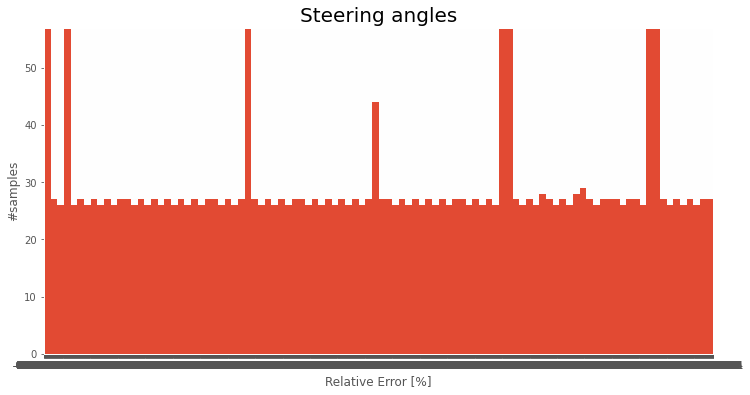

In [ ]:
def numeric_histogram(data):
    
    plt.figure(figsize = (12, 6))

    binwidth = 100
    #bins = np.arange(float(min(data)), float(max(data)) + binwidth, binwidth)
    #bins = bins = [0, 25, 50, 75, 100]
    #plt.hist(data, bins = bins)

    unique_values, counts = np.unique(data, return_counts=True)
    plt.hist(data, bins=min(len(counts), 100))
    plt.axis([min(data), max(data), 0, max(counts)]);


    plt.title("Steering angles", fontsize = 20)
    plt.xlabel("Relative Error [%]")
    plt.ylabel("#samples")
    #plt.axis([xmin = -1, xmax = 1, ymin= 0, ymax = 400])
    #plt.xlim([-1,1])

    #plt.xlim(-1,1)
    #plt.xticks([-1,-0.5,0, 0.5, 1])
    #plt.xticks(np.arange(0, 1, step=0.01))
    #plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
    #plt.tight_layout()
    
    #plt.axis(xmin = min(data), xmax = max(data));
    

    print("Total nr of steering angle values:", len(data))
    print("Max steering angle value:", max(data))
    print("Min steering angle value:", min(data))

numeric_histogram(steering_angles)

In [ ]:
# This should basically deal with creating more data from steering angles and also average the "0" values from the data

def flip_angles(line):
    new_line = -float(line)
    return new_line

steering_angles = ['-0.00000002']

def augment_steering_angles(steering_angles):
    initial_angles = []
    flipped_angles = []
    for line in steering_angles:
        # add excisting value to the list ->
        initial_angles.append(float(line))
        # add flipped value to the list ->
        flipped_value = flip_angles(line)
        flipped_angles.append(flipped_value)
    initial_angles = np.array(initial_angles)  
    initial_angles = sorted(["{:.8f}".format(float(i)) for i in initial_angles])
    flipped_angles = np.array(flipped_angles)  
    flipped_angles = sorted(["{:.8f}".format(float(i)) for i in flipped_angles])

    print(initial_angles)
    print(flipped_angles)

augment_steering_angles(steering_angles)

['-0.00000002']
['0.00000002']


In [ ]:
import cv2
import os
import numpy as np

%cd /content/drive/My Drive/Colab Notebooks/Neural_networks project/images

def read_image(initial_angles, flipped_angles):
  image = cv2.imread("00215962.png")
  BGR2RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  flip = cv2.flip(BGR2RGB, 1)

  fig = plt.figure(figsize=(14,7))
  subplot = plt.subplot(1, 2, 1)
  subplot.imshow(BGR2RGB)
  title = 
  #subplot.set_title(prefix+str(angle))
    
  #title = 'flipped '+prefix+str(-angle)
  subplot = plt.subplot(1, 2, 2)
  subplot.imshow(flip)
  #subplot.set_title(title)

  #return preprocess_image(image)

read_image(initial_angles, flipped_angles)

Down below should test if the image processing pipeline was a success - if the road line angles match the vechicles steering angle. 

### This should deal with saving the data in the correct format etc